In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis import read_log, read_logs
from analysis import generate_average

!which python


/Users/alexandra/ENV3/bin/python


In [6]:
size = 100
tag = "multiprocessing_mergesort"

In [7]:
data = []

files = ["alex", "gregor"]

for file in files:
    content = read_log(file, size=size)
    data = data + content
        
# data

In [8]:
df = pd.DataFrame(data = data, 
                  columns = ["processors", "time", "size", "name", "tag"])
df["speedup"] = df["time"].max()  / df["time"] 
df

,processors,time,size,name,tag,speedup
0,1,0.389,100,alex,multiprocessing_mergesort,2.136247
1,1,0.319,100,alex,multiprocessing_mergesort,2.605016
2,1,0.322,100,alex,multiprocessing_mergesort,2.580745
3,1,0.318,100,alex,multiprocessing_mergesort,2.613208
4,1,0.315,100,alex,multiprocessing_mergesort,2.638095
...,...,...,...,...,...,...
147,5,0.006,100,gregor,multiprocessing_mergesort,138.500000
148,4,0.005,100,gregor,multiprocessing_mergesort,166.200000
149,3,0.004,100,gregor,multiprocessing_mergesort,207.750000
150,2,0.005,100,gregor,multiprocessing_mergesort,166.200000


In [9]:
def plot_benchmark_by_size(df, size=None, tag=None, files=None, x="processors", y="time"):
    names = "-".join(files)
    sns.lineplot(data=df, x=x, y=y, hue="name");
    t = tag.title()
    label = f"{t}, Size={size}".replace("_", " ")
    plt.title(f"{label}");
    if "time" in y: y = f"{y}/s"
    if "time" in x: x = f"{x}/s"
    plt.xlabel(x.capitalize());
    plt.ylabel(y.capitalize());
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.png")
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.pdf")
    

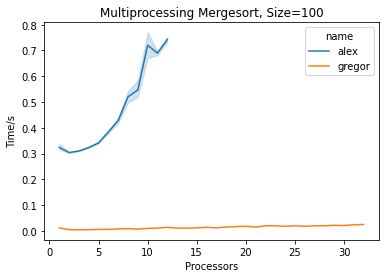

In [10]:
plot_benchmark_by_size(df, size, tag, files)

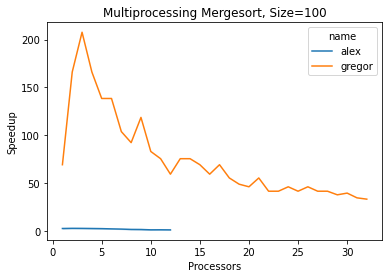

In [11]:
plot_benchmark_by_size(df, size=size, tag=tag, files=files, x="processors", y="speedup")

In [12]:
avg = pd.DataFrame()
for name in files:
    _df = generate_average(df, tag="multiprocessing_mergesort", name=name, size=100)
    avg = pd.concat([avg, _df])
avg.head()

,,,,time,speedup,tag,name
processors,name,size,tag,,,,
1,alex,100,multiprocessing_mergesort,0.3239,2.575592,multiprocessing_mergesort,alex
2,alex,100,multiprocessing_mergesort,0.3042,2.731925,multiprocessing_mergesort,alex
3,alex,100,multiprocessing_mergesort,0.3101,2.679916,multiprocessing_mergesort,alex
4,alex,100,multiprocessing_mergesort,0.3238,2.566828,multiprocessing_mergesort,alex
5,alex,100,multiprocessing_mergesort,0.3417,2.432238,multiprocessing_mergesort,alex


['alex', 'gregor'] 100 multiprocessing_mergesort


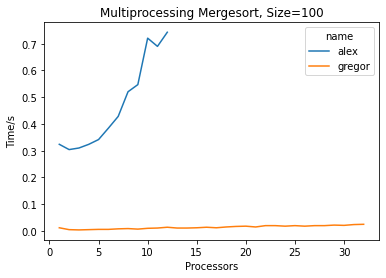

In [13]:
print(files, size, tag)
plot_benchmark_by_size(avg, size=size, tag=tag, files=files)

In [14]:
speedup = pd.DataFrame(avg)
speedup["p"] = speedup.index.get_level_values(0).astype(float)
speedup["speedup"] = speedup["time"].max() / speedup["p"]

In [15]:
speedup. head()

,,,,time,speedup,tag,name,p
processors,name,size,tag,,,,,
1,alex,100,multiprocessing_mergesort,0.3239,0.742700,multiprocessing_mergesort,alex,1.0
2,alex,100,multiprocessing_mergesort,0.3042,0.371350,multiprocessing_mergesort,alex,2.0
3,alex,100,multiprocessing_mergesort,0.3101,0.247567,multiprocessing_mergesort,alex,3.0
4,alex,100,multiprocessing_mergesort,0.3238,0.185675,multiprocessing_mergesort,alex,4.0
5,alex,100,multiprocessing_mergesort,0.3417,0.148540,multiprocessing_mergesort,alex,5.0


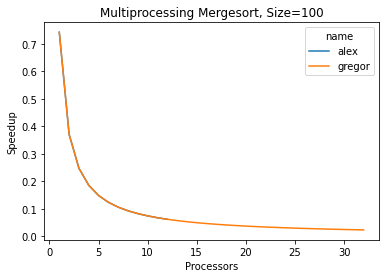

In [16]:
plot_benchmark_by_size(avg, size=size, tag=tag, files=files, x="processors", y="speedup")